## Exemplo do funcionamento de diferentes classificadores

Esse notebook surgiu com a o intuito de demonstrar exatamente como cada classificador funciona em uma amostra.
<BR>Como ensejo para esse experimento, acredito que o ZEN do python, exemplifica o meu objetivo final.

“In the face of ambiguity, refuse the temptation to guess.”
<BR>  __-The Zen Python__

O codigo aqui disposto nao e de minha autoria, a utilizacao do mesmo e feita a titulo ludico e serve como base para iniciar novos projetos

***

### Referencias desse Notebook

Esse notebook usa como referencia a documentação do do Scikit-Learn
<BR>- __Refrência__ : http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

__Codigo original:__  Gaël Varoquaux<BR>                      Andreas Müller<BR>
                      
__Modificado para documentacao por:__ Jaques Grobler<BR>
__Licenca:__ BSD 3 clause

***

__Bibliotecas usadas__

In [1]:
import numpy as np # ........................................................... - Requisito - Biblioteca para trabalhar com valores numericos complexos no python
import matplotlib.pyplot as plt # .............................................. - Apresentacao - Utilizado para apresentar os dados de forma visual
from matplotlib.colors import ListedColormap # ................................. - Apresentacao - Mapa de cores da biblioteca matplotlib, utilizado para apresentacao
from sklearn.model_selection import train_test_split # ......................... - Preprocessamento - Usado para separar a amostra em treino e teste
from sklearn.preprocessing import StandardScaler # ............................. - Preprocessamento - Usado para 'normalizar' valores
from sklearn.datasets import make_moons, make_circles, make_classification # ... - Dados - Usado para criar os dados a serem classificados
from sklearn.neural_network import MLPClassifier # ............................. - Modelo - Para realizar o comprativo com uma rede neural Multi Layer Perceptron
from sklearn.neighbors import KNeighborsClassifier # ........................... - Modelo - Para realizar o comparativo com um KNN
from sklearn.svm import SVC # .................................................. - Modelo - Para realizar o comparativo com um SVN
from sklearn.gaussian_process import GaussianProcessClassifier # ............... - Modelo - Para realizar o comparativo com um classificador gaussiano
from sklearn.gaussian_process.kernels import RBF # ............................. - Modelo - Para realizar o comparativo com um classificador gaussiano
from sklearn.tree import DecisionTreeClassifier # .............................. - Modelo - Para realizar o comparativo com um comparativo de arvore de decisão simples (J48)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier # ...... - Modelo - Para realizar o comparativo de arvores via Random Forest
from sklearn.naive_bayes import GaussianNB # ................................... - Modelo - Para realizar o comparativo via Naive BAyes
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis # ...... - Pos processamento/Validacao - Métricas de comparacao

__Inicializacao de variaveis__

In [2]:
h = .02  # Tamanho do 'passo' de aprendizado da rede

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"] # Nomes dos classificadores que serao exibidos no resultado final

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()] # Inicializacao dos claissificadores

__Inicializacao de parametros de classificadores__

In [3]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

__Iteracao de datasets e de classificadores__

c:\users\marcelo.bracali\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\marcelo.bracali\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\marcelo.bracali\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


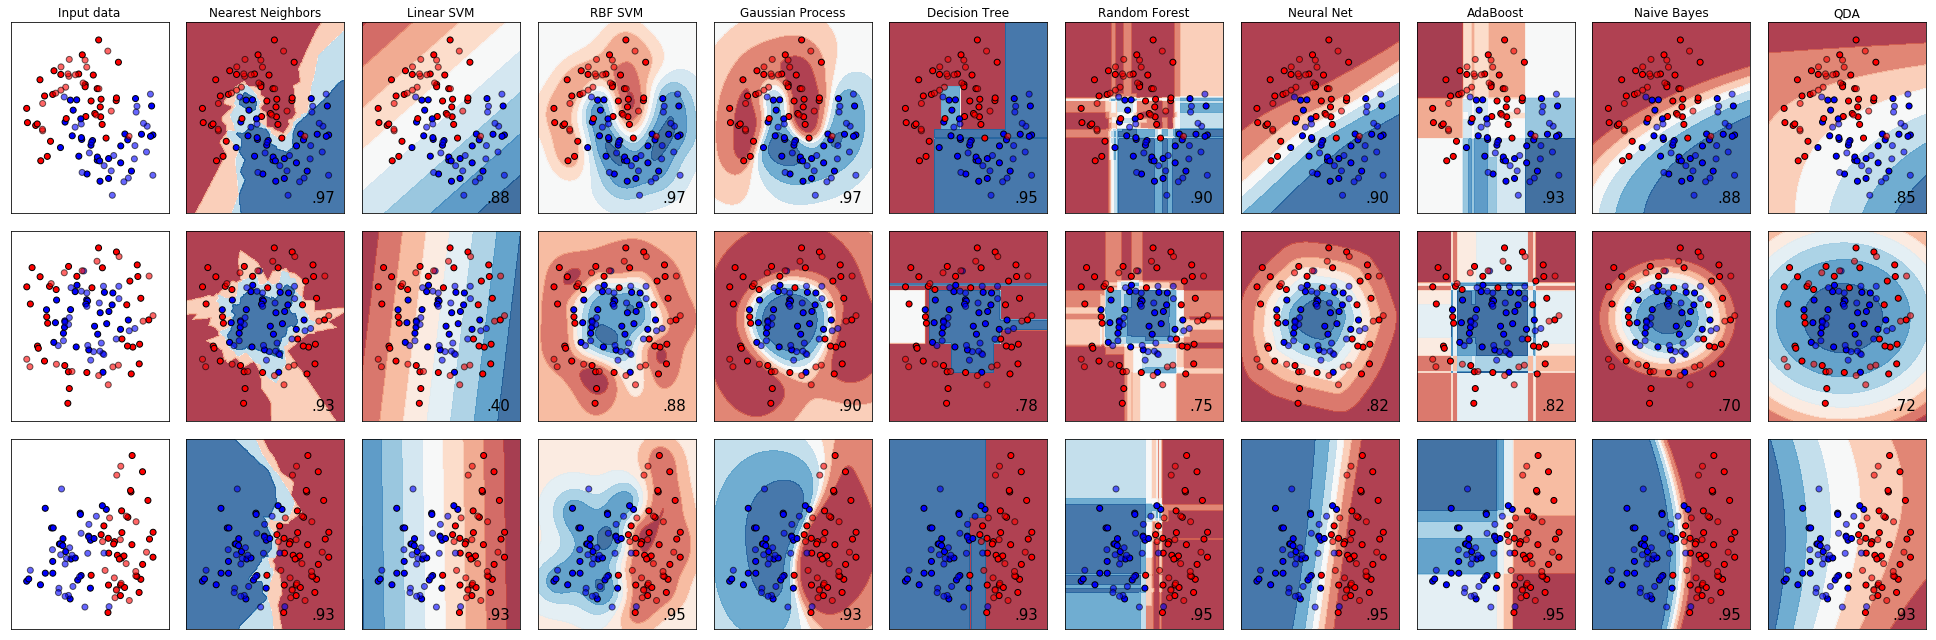

In [4]:
figure = plt.figure(figsize=(27, 9)) # Define o tamanho das imagens que serao exibidas no final

i = 1 # Inicializa contador

# Primeiro for, itera sobre os datasets
for ds_cnt, ds in enumerate(datasets):
    
    # Processamento inicial do dataset, divide o dataset em teste e treino
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # A titulo de exibicao, primeiro o dataset e mostrado sem classificacoes
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1 # Incremento do contador

    # Para o dataset da vez, e feita uma iteracao para cada classificador
    for name, clf in zip(names, classifiers):
        
        # Define ax do plot
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        # Treina o classificador em questao
        clf.fit(X_train, y_train)
        
        # Armazena o score do do modelo treinado
        score = clf.score(X_test, y_test) 

        # Define os limites das amostras classificadas. para tal, vamos usar uma cor para cada area
        # Mostra o ponto no grid [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Coloca os rtesultados coloridos em um plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot dos pontos de treino
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot dos pontos de teste
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        # Parametros de impressao dos graficos criados
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        
        i += 1 # Incremento do contador

# Mostra o plot
plt.tight_layout()
plt.show()

***

<h3><b> Conclusão </h3>

__Atenção:__ O teste foi feito a partir do exemplo de codigo encontrado na documentacao do Scikit-Learn.<BR>
É importante notar que o experimento foi feito sem um tunning fino dos parametros de cada um dos classificadores e que se investirmos algum tempo nesse tipo de ajuste fino, podemos encontrar resultados mais aderentes com a nossa necessidade.<BR>
Como conclusão, podemos ter esse mapa de classificacoes em mente para iniciarmos analises exploratorias e prototipos de respostas.

***

__Por:__ Marcelo Mastrangi Bracali - bracali14@gmail.com